# 05_Join


GitHub is the most popular place to collaborate on software projects. A GitHub repository (or repo) is a collection of files associated with a specific project.

Most repos on GitHub are shared under a specific legal license, which determines the legal restrictions on how they are used. For our example, we're going to look at how many different files have been released under each license.

We'll work with two tables in the database. The first table is the licenses table, which provides the name of each GitHub repo (in the repo_name column) and its corresponding license. Here's a view of the first five rows.

In [1]:
from google.cloud import bigquery
client = bigquery.Client.from_service_account_json("./My Project 61217-9183df10355d.json")
dataset_ref = client.dataset('github_repos', project = 'bigquery-public-data')
# API request -fetch dataset
dataset = client.get_dataset(dataset_ref)

In [2]:
# list all the tables in the hacker news dataset
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)

commits
contents
files
languages
licenses
sample_commits
sample_contents
sample_files
sample_repos


In [3]:
table_ref = dataset_ref.table('licenses')
table = client.get_table(table_ref)

In [4]:
client.list_rows(table, max_results=5).to_dataframe()

,repo_name,license
0,Manwar/WWW-Google-APIDiscovery,artistic-2.0
1,FindAllTogether/LifeIDE,artistic-2.0
2,skaji/perl6-HTTP-Tinyish,artistic-2.0
3,jonathanstowe/Oyatul,artistic-2.0
4,gitpan/App-FastishCGI,artistic-2.0


## Second table - sample_files table

In [5]:
table_ref = dataset_ref.table('sample_files')
table = client.get_table(table_ref)
client.list_rows(table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,git/git,refs/heads/master,RelNotes,40960,62615ffa4e97803da96aefbc798ab50f949a8db7,Documentation/RelNotes/2.10.0.txt
1,np/ling,refs/heads/master,tests/success/plug_compose.t/plug_compose.ll,40960,0c1605e4b447158085656487dc477f7670c4bac1,../../../fixtures/all/plug_compose.ll
2,np/ling,refs/heads/master,fixtures/strict-par-success/parallel_assoc_lef...,40960,b59bff84ec03d12fabd3b51a27ed7e39a180097e,../all/parallel_assoc_left.ll
3,np/ling,refs/heads/master,fixtures/sequence/parallel_assoc_2tensor2_left.ll,40960,f29523e3fb65702d99478e429eac6f801f32152b,../all/parallel_assoc_2tensor2_left.ll
4,np/ling,refs/heads/master,fixtures/success/my_dual.ll,40960,38a3af095088f90dfc956cb990e893909c3ab286,../all/my_dual.ll


In [12]:
query = """
        SELECT L.license, COUNT(1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
file_count_by_license = query_job.to_dataframe()
file_count_by_license

,license,number_of_files
0,mit,20617285
1,gpl-2.0,17114463
2,apache-2.0,7228524
3,gpl-3.0,4954668
4,bsd-3-clause,2944356
5,agpl-3.0,1309762
6,lgpl-2.1,800634
7,bsd-2-clause,700899
8,lgpl-3.0,567477
9,mpl-2.0,469300


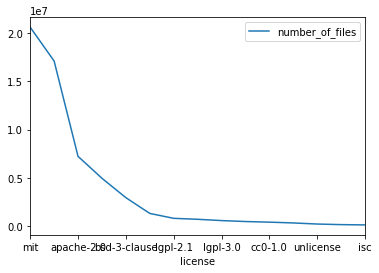

In [14]:
file_count_by_license.set_index('license').plot()